In [2]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.metrics import r2_score as R2S
import cairo

## Names and Palette ##

In [3]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2024-03-21


'2024-03-21'

In [4]:
tubulin = '[Tubulin] (' r'$\mu$' 'M)'
tub = 'tub'

DCXconc = '[DCX] (nM)' 
EBconc = '[EB] (nM)'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration (' r'$\mu$' 'M)'
Length = 'Length (' r'$\mu$' 'm)'
Lifetime = 'Lifetime (min)'
GrowthRate = 'Growth Rate (' r'$\mu$' 'm/min)'
TimeToNucleate = 'Time to Nucleate (min)'
ShrinkageLength = 'Shrink Length (' r'$\mu$' 'm)'
ShrinkageLifetime = 'Shrink Lifetime (min)'
ShrinkageRate = 'Shrink Rate (' r'$\mu$' 'm/min)'
RescuePerLength = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' ')'
RescuePerTime = 'Rescues ( s' r'$^{-1}$' ')'
RescuePerLT = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' 's'  r'$^{-1}$' ')'

In [5]:
Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']

category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [6]:
grey00 = '#777777'
grey20 = '#C5C5C5'
cyan00 = '#0089CF'  
cyan20 = '#65CBFF'
pink00 = '#e468b8'
pink20 = '#FBB0E1'
orange00 = '#ff8341'
orange20 = '#FFC6A8'


In [7]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette_all = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
palette_ppr = [grey] + list(map(Color.get_hex,DC1color))[:-1] + list(map(Color.get_hex,DC2color)) + [cyan]

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
palette_ppr

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


['#777777', '#ab4a9c', '#e468b8', '#ff5b00', '#ff8341', '#ffac83', '#0089CF']

In [8]:
### font for matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'

## Open data if already saved ##

In [9]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file


In [13]:
data = pd.read_csv(askmastersheet, encoding='utf-8')
data 

,[Tubulin] ($\mu$M),Growth Rate ($\mu$m/min)
0,6,0.204303
1,6,0.216410
2,6,0.397606
3,6,0.404851
4,6,0.382525
...,...,...
2384,15,1.167496
2385,15,0.941585
2386,15,0.999491
2387,15,1.458611


In [14]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/sofia/OneDrive/Documentos/mcgill/Thesis/Figures-intro/growth_curve/Plots')

In [51]:
GRmean = data.groupby(by=[tubulin]).mean()

In [62]:
y = GRmean[GrowthRate].values
x = data[tubulin].unique()

In [63]:
p, cov = np.polyfit(x,y, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
p, SElin

(array([ 0.09132218, -0.25880356]), array([0.00453989, 0.0489563 ]))

## Growth Curve ##

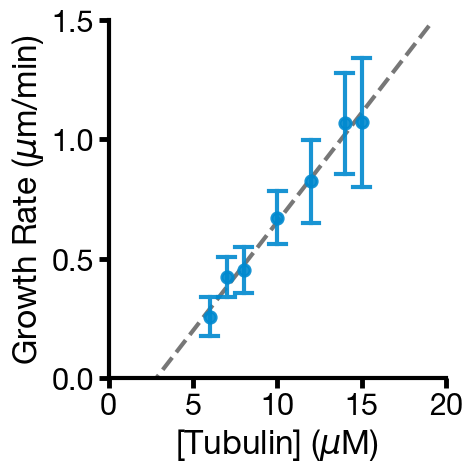

In [99]:
scattersize = 8
cap = 1
linetype = ['','--', ':','--', ':', '-.','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]
palette = [grey,cyan]#palette_ppr

linx = np.arange(0, 20, 1)
ax.plot(linx, linx*p[0]+p[1], color = grey, lw=3,ls= '--',alpha = 1)


sns.pointplot(
    data=data, x=tubulin, y=GrowthRate, errorbar=('sd'),native_scale=True,markersize=scattersize,
    ax=ax, linestyle="none", color = cyan,alpha = 0.9, capsize=cap, linewidth=3
)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0,1.5)
ax.set_yticks(np.arange(0, 1.51, 0.5))
ax.set_xlim(0,20)
ax.set_xticks(np.arange(0, 20.1, 5))
ax.set_xlabel(tubulin)


#ax.set_title('Rescue')
ax.set_ylabel(GrowthRate)

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('growthrate'+date+'.pdf'))

In [100]:
(13.89-7.38)/(9.29-5.261)

1.615785554728221